In [2]:
cd /content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet

/content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet


In [3]:
#According to Study #1, we propose studying ALL characteristics of voice
#Biometrics and 2 classes (TD and ASD) in order to classify the subjects.
#The purpose of this iteration is to validate the study results.
#The study entailed the following steps:

#1. Selecting ALL characteristicss and 2 classes ('ASD' and 'TD') as per article's
#identified characteristics and classes.

#2. Reduce dimension from 19 to 9 characteristics and further streamline outliers with PCA.

#3. Splitting dataset (70%/30%), normalizing dataset and apply unsupervised KMeans++
#to train model .  (Left with 43 rows, from initial 108).

#4. Compute, measure and determine optimal K for KMeans clustering performance
#(k=2) with the elbow method (error_rate and inertia), accuracy and
# silhouette score,

#5. Apply unsupervised KMeans++ with optimal clustering (k=2) for predictive analysis
#using shiffle aplit and cross-validation

#6. Explore metric_learn RCA method for optimal clustering execution. Also
# DBSCAN, HDBSCAN and Optics were explored with GridResearch CV for
#hyperparameters.

#7. Measure predictive model for performance using ROC method. eg SVM,
#LogisticRegression, RandomForestClassification, KNeighbor, etc.

#8. Apply KMeqn++ Monte Carlo cross-validation (ShuffleSplit on 300 samples) method
#and score and evaluate model performance with clustering accuracy and ROC.

#Load data.
import pandas as pd
df=pd.read_csv("voice_data.csv")
data=df
display(df)
df.columns

df.loc[df.Group == 'ASD'].count()


,Group,avg_f0,avg_F1,avg_F2,avg_F3,avg_F4,mean_hnr,jitter,shimmer,dispersion_formantique,avg_f0_k,mean_hnr_k,jitter_k,shimmer_k,dispersion_formantique_k,avg_f0_s,mean_hnr_s,jitter_s,shimmer_s,dispersion_formantique_s
0,ASD,304.75,778.00,2245.60,3571.05,5081.95,10.75,1.958567,1.377360,1434.650000,4.120596,6.512729,4.430703,2.066858,5.193159,1.026296,1.519206,1.205160,-0.259522,0.069057
1,ASD,294.45,662.70,1939.90,3251.25,4775.30,12.25,1.663247,1.389308,1370.866667,2.278845,3.440682,3.091686,3.108758,2.927942,0.133170,0.667077,0.560049,-0.244830,-0.390032
2,ASD,255.85,884.55,2183.50,3513.75,5111.40,12.90,1.422039,1.185426,1408.950000,1.737850,5.391922,2.999970,3.019235,2.481138,0.169958,1.548892,0.722608,-0.348192,0.175821
3,ASD,292.75,652.05,2022.60,3177.75,4634.10,8.65,1.729150,1.645441,1327.350000,8.688811,2.620909,2.320086,2.652073,2.249446,-2.098723,-0.134290,0.045519,0.452664,0.225971
4,ASD,305.75,739.75,2294.25,3706.60,4807.55,8.30,2.033454,1.544171,1355.933333,3.761873,3.485672,3.841500,7.036189,3.318189,0.993320,0.670789,1.151768,-1.606129,-0.338201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,TD,255.05,858.95,2223.80,3384.55,4787.25,9.75,1.111741,1.302515,1309.433333,5.190369,3.365465,1.875519,3.242620,1.881098,1.338850,0.806779,0.273689,-0.246472,0.152368
104,TD,265.00,1022.95,2350.50,3596.25,4973.85,9.80,2.340409,1.299065,1316.966667,3.619754,6.548035,8.302562,2.789693,4.012588,1.028263,1.752227,2.363517,0.612808,0.451664
105,TD,266.45,762.45,2278.70,3557.60,4742.95,10.95,1.489093,1.517415,1326.833333,2.151113,2.531716,3.208905,2.385634,3.771958,0.114164,0.130736,0.951328,-0.507807,1.004282
106,TD,274.95,873.00,2299.70,3672.65,4917.65,9.35,1.391963,1.264749,1348.216667,3.473041,2.755562,2.825725,2.361107,2.442094,-0.777756,0.412494,0.655506,0.554750,-0.074498


,0
Group,38
avg_f0,38
avg_F1,38
avg_F2,38
avg_F3,38
avg_F4,38
mean_hnr,38
jitter,38
shimmer,38
dispersion_formantique,38


Study #1 - Dataset loading and selection of features (19) and target class (1).

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Ensure y and X are created from the same filtered DataFrame
filtered_data = data.loc[(data.Group == 'ASD') | (data.Group == 'TD')]

y_numeric = LabelEncoder().fit_transform(filtered_data.iloc[:,0])
print(y_numeric)

#4 characteristics
X=filtered_data.loc[:,['avg_F1', 'jitter_s', 'shimmer', 'mean_hnr']]
X_Scaled = StandardScaler().fit_transform(X)
print(X_Scaled)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[-4.61952762e-01  2.39735400e-01 -1.12675453e-01  4.49719357e-01]
 [-1.23611743e+00 -5.45820432e-01 -4.45366470e-02  1.08437642e+00]
 [ 2.53461335e-01 -3.47870830e-01 -1.20724915e+00  1.35939447e+00]
 [-1.30762527e+00 -1.17236599e+00  1.41616308e+00 -4.38800526e-01]
 [-7.18776687e-01  1.74720731e-01  8.38627596e-01 -5.86887173e-01]
 [-6.37868758e-01 -6.59597044e-01 -2.29494668e-01  9.99755474e-01]
 [-8.52056554e-01 -7.72166768e-01  9.37026285e-01 -1.84937702e-01]
 [-1.08705884e+00 -1.55852803e+00  3.51125953e-01  6.82426945e-01]
 [-4.53224106e-01 -3.05658994e-01  6.69792802e-01 -1.63782467e-01]
 [-4.90488754e-01 -3.39440697e-01  1.71143134e+00 -5.02266231e-01]
 [-1.87129503e+00 -5.43412823e-01  1.80997893e-01  9.78600239e-01]
 [-7.11726619e-01 -5.80319131e-01  1.89134041e+00 -1.26385470e+00]
 [-1.46541252e+00 -1.76294773e+00  1.58800675e+00 -5.80062903e-02]
 [

Features' rankings: 



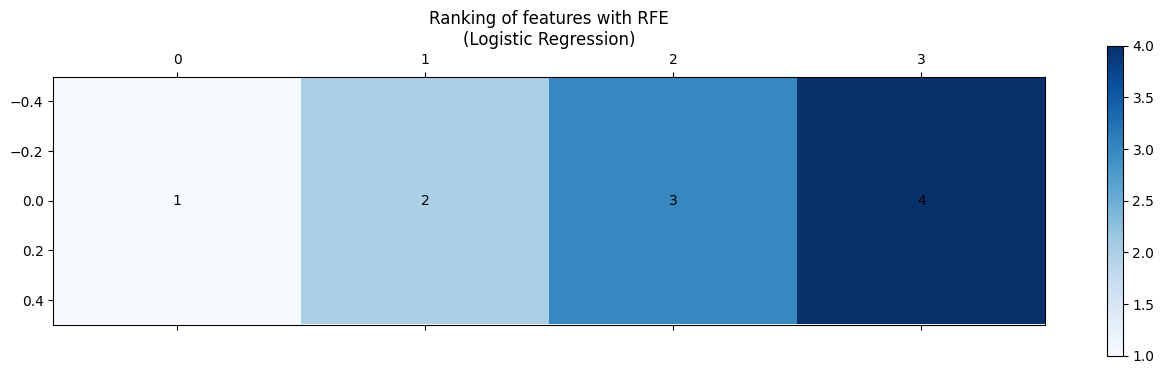

In [14]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rfe", RFE(estimator=LogisticRegression(), n_features_to_select=1, step=1)),
    ]
)

pipe.fit(X_Scaled, y_numeric)

ranking = pipe.named_steps["rfe"].ranking_
ranking = ranking.reshape(1, -1)

print("Features' rankings: \n")
#print(X.columns[1], ", ", X.columns[16], ", ", X.columns[7], ", ", X.columns[0])
#print(X.columns[5], ", ", X.columns[6], ", ", X.columns[11], ", ", X.columns[8])
#print(X.columns[4], ", ", X.columns[12], ",", X.columns[2], ", ", X.columns[9])
#print(X.columns[3], ", ", X.columns[13], ", ", X.columns[15], ", ", X.columns[10])
#print(X.columns[18], ", ", X.columns[17], "\n")

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)

# Add annotations for pixel numbers
for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of features with RFE\n(Logistic Regression)")
plt.show()

Dimension reduction with PCA metric_learn from 19 to 6, or 9?

In [15]:
#Removed RCA and replaced it with PCA for dimension reduction.
#RCA (metric_learn) makes use of Mahalanobis instead of eucledien distances;
# which proved to be unstable generating intermittent complex numbers and
# occasional division by zero leading to NaN values.

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

y = y_numeric

# Creating a PCA object.
pca = PCA(n_components=4)

X_pca = pca.fit_transform(X_Scaled)
#X_pca = pca.fit_transform(X_scaled)
#print("Fitted and transformed: ", X_pca)

print("Explained variance ratio is:", sum(pca.explained_variance_ratio_))
print("Number of components: ", pca.n_components)

Explained variance ratio is: 1.0000000000000002
Number of components:  4


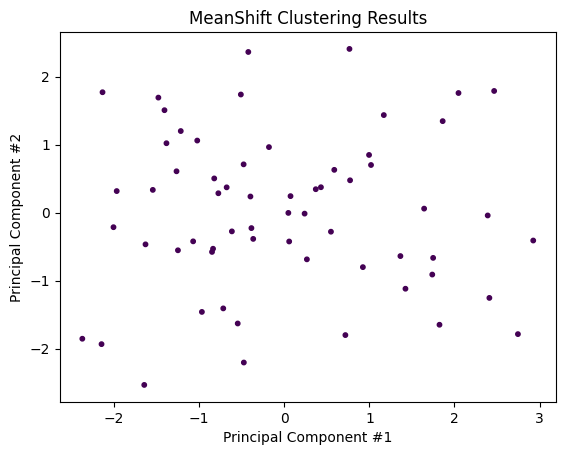

62


In [16]:
#MeanShift clustering

from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate bandwidth automatically
bandwidth = estimate_bandwidth(X_pca, quantile=1.00)  # Try adjusting quantile

# Apply MeanShift
meanshift = MeanShift(bandwidth=bandwidth)
clusters = meanshift.fit_predict(X_pca)

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", s=10)
plt.title("MeanShift Clustering Results")
plt.xlabel("Principal Component #1")
plt.ylabel("Principal Component #2")
plt.show()

print(len(X_pca))

62


<ipython-input-18-146a4b6260e2>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


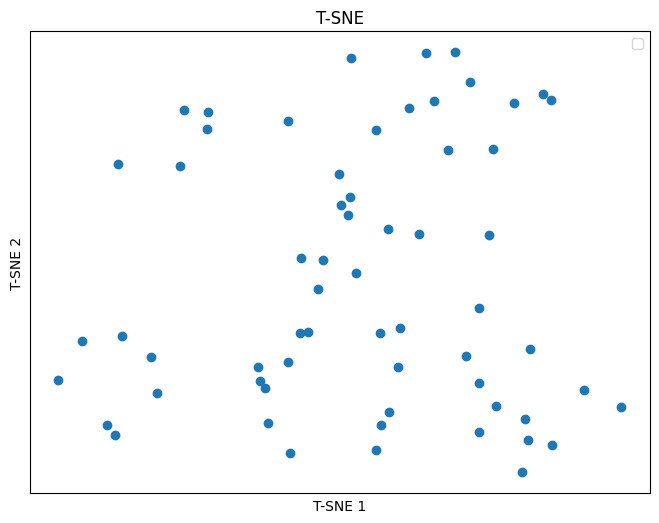

62


In [18]:
# Using T-TSNE for visializing the reduced dataset (4 components).
# Here 'NaN' values are replaced with "mean" valuesl if applicable.

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Define the plot_tsne function
def plot_tsne(X, y, colormap=plt.cm.Paired):
    """
    Plots t-SNE visualization of the data.
    """

    plt.figure(figsize=(8, 6))
    plt.clf()
    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
    plt.xticks(())
    plt.yticks(())
    plt.xlabel("T-SNE 1")
    plt.ylabel("T-SNE 2")
    plt.title("T-SNE")
    plt.legend(loc="best")
    plt.show()

# Create an imputer to replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
X_pca_imputed = imputer.fit_transform(X_pca)
print(len(X_pca_imputed))

# Now plot the imputed data with TSNE
plot_tsne(X_pca_imputed, y_numeric)

print(len(X_pca_imputed))

In [19]:
#Computing the optimal value for "k".

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 62, n_init='auto').fit(X_pca)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_pca, model.labels_, metric='euclidean'))

print("The optimal value for k is", score.index(max(score))+2)

The optimal value for k is 2


In [26]:
#Applying MeanShift/KMeans_plusplus for clustering on X_pca dataset
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, classification_report
from sklearn.metrics import silhouette_score
from sklearn.cluster import kmeans_plusplus, KMeans
from sklearn.model_selection import ShuffleSplit

#centers, _ = kmeans_plusplus(X_pca_imputed, n_clusters=2, random_state=0)

#bandwidth = estimate_bandwidth(X_pca, quantile=0.75)
#model= MeanShift(bandwidth=bandwidth)
#model.fit(X_pca)

model = KMeans(n_clusters=2, init="k-means++", verbose=10)
cluster_labels = model.fit_predict(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_pca, cluster_labels, test_size=0.3)

cv = ShuffleSplit(n_splits=400, test_size=0.3)

model.fit_predict(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy", verbose=5)#, scoring='roc_auc') #, scoring="r2")#scoring='neg_mean_squared_error')
scores = scores[~np.isnan(scores)]

print("\nModel best cross-validation sore ('accuracy') : ", np.max(scores))

y_pred = model.fit(X_train, y_train).predict(X_train)
print(model.get_params(), "\n")

print(classification_report(y_train, y_pred), "\n")

#acc = accuracy_score(y_train, y_pred)
print("\nMean's Accuracy Score: ", np.mean(scores))

s_score = silhouette_score(X_train, y_pred) #metric=rca.get_metric())
print("\nSilhouette Score is: ", s_score)


Initialization complete
Iteration 0, inertia 233.59486429910868.
Iteration 1, inertia 166.52383099530834.
Iteration 2, inertia 164.8956862426863.
Iteration 3, inertia 164.45003633393057.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 181.6499924316933.
Iteration 1, inertia 116.70539087107754.
Iteration 2, inertia 110.39386370355516.
Iteration 3, inertia 105.90650647711948.
Iteration 4, inertia 105.65115329319661.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 105.46063968982662.
Iteration 1, inertia 79.96068421276601.
Iteration 2, inertia 79.18229995333155.
Iteration 3, inertia 77.11030024596266.
Iteration 4, inertia 76.17930115738434.
Iteration 5, inertia 75.15163509292188.
Converged at iteration 5: strict convergence.
[CV] END ................................ score: (test=0.000) total time=   0.0s
Initialization complete
Iteration 0, inertia 112.04095803547636.
Iteration 1, inertia 94.604223589903

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


[CV] END ................................ score: (test=0.000) total time=   0.0s
Initialization complete
Iteration 0, inertia 140.97576083989654.
Iteration 1, inertia 94.91274512298914.
Iteration 2, inertia 94.66698042644079.
Iteration 3, inertia 94.37308717376948.
Converged at iteration 3: strict convergence.
[CV] END ................................ score: (test=0.385) total time=   0.0s
Initialization complete
Iteration 0, inertia 111.61140915724698.
Iteration 1, inertia 81.05631346479856.
Iteration 2, inertia 78.83849094549078.
Iteration 3, inertia 74.43207166940554.
Iteration 4, inertia 72.54453727791989.
Converged at iteration 4: strict convergence.
[CV] END ................................ score: (test=1.000) total time=   0.0s
Initialization complete
Iteration 0, inertia 93.93625815469942.
Iteration 1, inertia 78.82980644721476.
Iteration 2, inertia 70.39713942917258.
Iteration 3, inertia 69.55734302749934.
Converged at iteration 3: strict convergence.
[CV] END ................

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Initialization complete
Iteration 0, inertia 95.38131045574372.
Iteration 1, inertia 69.50615767624227.
Converged at iteration 1: strict convergence.
[CV] END ................................ score: (test=0.000) total time=   0.0s
Initialization complete
Iteration 0, inertia 132.4698717757034.
Iteration 1, inertia 90.95160317571766.
Iteration 2, inertia 89.65297190839037.
Converged at iteration 2: strict convergence.
[CV] END ................................ score: (test=0.462) total time=   0.0s
Initialization complete
Iteration 0, inertia 97.9548508211486.
Iteration 1, inertia 77.44953669681387.
Iteration 2, inertia 71.28922704140611.
Iteration 3, inertia 70.27434347684803.
Converged at iteration 3: strict convergence.
[CV] END ................................ score: (test=0.154) total time=   0.0s
Initialization complete
Iteration 0, inertia 132.9752130915431.
Iteration 1, inertia 84.2970862318799.
Iteration 2, inertia 80.14385130913884.
Iteration 3, inertia 74.8420461096898.
Iterat

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.7s


Iteration 1, inertia 77.41996924305064.
Iteration 2, inertia 76.05609349344115.
Iteration 3, inertia 75.03561274347662.
Converged at iteration 3: strict convergence.
[CV] END ................................ score: (test=1.000) total time=   0.0s
Initialization complete
Iteration 0, inertia 105.03364269242289.
Iteration 1, inertia 66.63484388562692.
Iteration 2, inertia 63.95369709105136.
Converged at iteration 2: strict convergence.
[CV] END ................................ score: (test=0.000) total time=   0.0s
Initialization complete
Iteration 0, inertia 98.96592953455335.
Iteration 1, inertia 69.22685069957137.
Converged at iteration 1: strict convergence.
[CV] END ................................ score: (test=0.000) total time=   0.0s
Initialization complete
Iteration 0, inertia 142.41501478701943.
Iteration 1, inertia 73.54421241875848.
Iteration 2, inertia 70.53360478097325.
Iteration 3, inertia 70.17107730321594.
Converged at iteration 3: strict convergence.
[CV] END ..........

[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    1.2s


Initialization complete
Iteration 0, inertia 184.8842834943309.
Iteration 1, inertia 83.70057191057317.
Iteration 2, inertia 80.45944154471573.
Iteration 3, inertia 78.01363186950458.
Iteration 4, inertia 73.49722969814144.
Iteration 5, inertia 69.4783913448978.
Iteration 6, inertia 68.54847616323991.
Converged at iteration 6: strict convergence.
[CV] END ................................ score: (test=1.000) total time=   0.0s
Initialization complete
Iteration 0, inertia 82.9074561870043.
Iteration 1, inertia 63.273661522461104.
Converged at iteration 1: strict convergence.
[CV] END ................................ score: (test=0.923) total time=   0.0s
Initialization complete
Iteration 0, inertia 120.18039679927487.
Iteration 1, inertia 82.6257538377518.
Iteration 2, inertia 77.9052891919223.
Iteration 3, inertia 75.87090516594509.
Iteration 4, inertia 73.08426629431968.
Converged at iteration 4: strict convergence.
[CV] END ................................ score: (test=0.000) total ti

[[13  5]
 [ 0 25]]
2
2


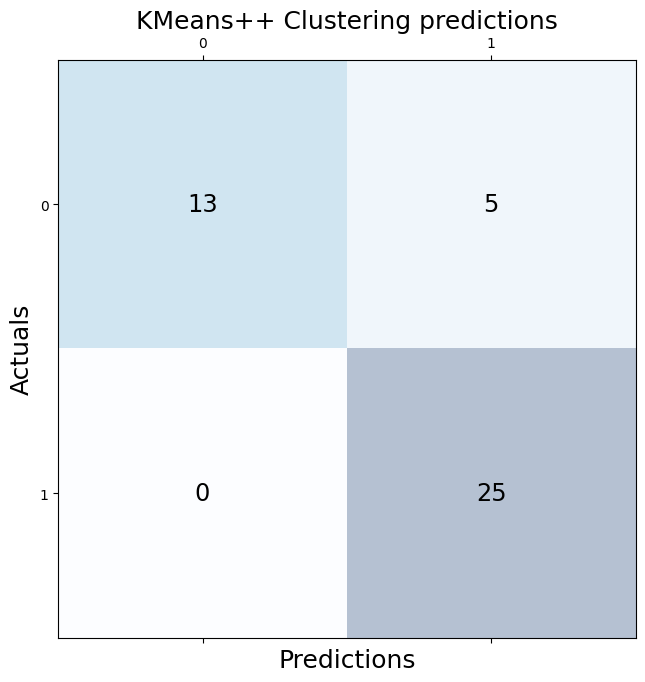

In [27]:
# Displaying the confusion matrix for 2 classes (Groups - ASD and TD)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm=confusion_matrix(y_train, y_pred)

print(cm)
print(cm.shape[0])
print(cm.shape[1])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('KMeans++ Clustering predictions', fontsize=18)
plt.show()


In [37]:
#Utilisation de SVC pour la classification et la prédiction, et ROC pour le scoringg.
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, classification_report

from sklearn.cluster import kmeans_plusplus, KMeans
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_numeric, test_size=0.3)

rs = ShuffleSplit(n_splits=100, test_size=0.3)

#Creation du SVC au lieu de KMeans++
model = SVC(kernel="linear", probability=True)

scores = cross_val_score(model, X_train, y_train, cv=rs, verbose=5, scoring='roc_auc') #, scoring="r2")#scoring='neg_mean_squared_error')
scores = scores[~np.isnan(scores)]

print("\nSVC classification with ROC scoring: ", scores)

y_pred = model.fit(X_train, y_train).predict(X_train)

print("\nAccuracy Score: ", accuracy_score(y_train, y_pred))

print("\nClassification Report: \n", classification_report(y_train, y_pred))



[CV] END ................................ score: (test=0.667) total time=   0.0s
[CV] END ................................ score: (test=0.800) total time=   0.0s
[CV] END ................................ score: (test=0.762) total time=   0.0s
[CV] END ................................ score: (test=0.667) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] END ................................ score: (test=0.857) total time=   0.0s
[CV] END ................................ score: (test=0.900) total time=   0.0s
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] END ................................ score: (test=0.833) total time=   0.0s
[CV] END ................................ score: (test=0.850) total time=   0.0s
[CV] END ................................ score: (test=0.800) total time=   0.0s
[CV] END ................................ score: (test=0.933) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


[CV] END ................................ score: (test=0.925) total time=   0.0s
[CV] END ................................ score: (test=0.909) total time=   0.0s
[CV] END ................................ score: (test=0.694) total time=   0.0s
[CV] END ................................ score: (test=0.722) total time=   0.0s
[CV] END ................................ score: (test=0.867) total time=   0.0s
[CV] END ................................ score: (test=0.725) total time=   0.0s
[CV] END ................................ score: (test=0.900) total time=   0.0s
[CV] END ................................ score: (test=0.333) total time=   0.0s
[CV] END ................................ score: (test=0.800) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.867) total time=   0.0s
[CV] END ................................ score: (test=0.875) total time=   0.0s
[CV] END ...................

[0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 1]
[[25  3]
 [ 1 14]]
2
2


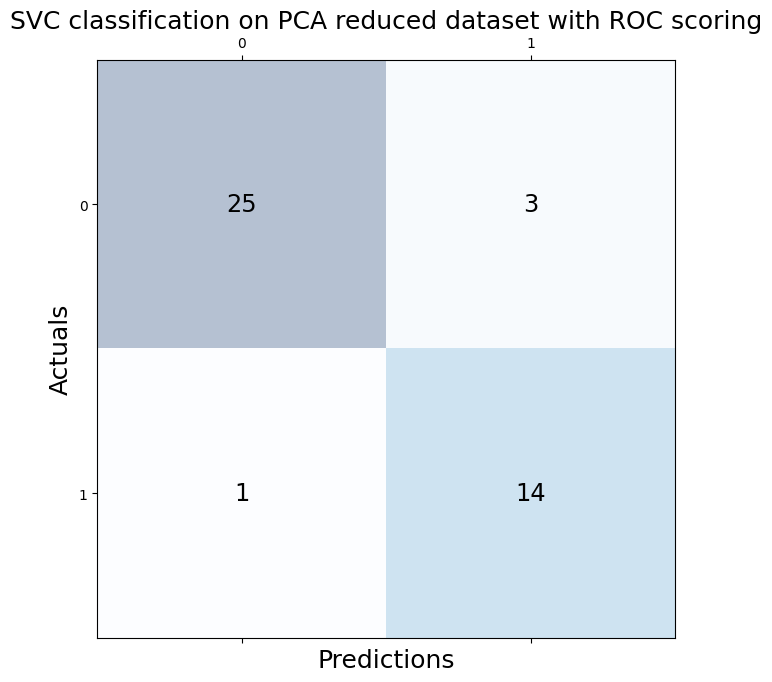

In [38]:
# Displaying SVC confusion matrix for 2 classes (Groups - ASD and TD)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print(y_train)

cm=confusion_matrix(y_train, y_pred)
#print(X_test)
print(cm)
print(cm.shape[0])
print(cm.shape[1])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SVC classification on PCA reduced dataset with ROC scoring', fontsize=18)
plt.show()


In [41]:
#Utilisation de KNeighbors pour la classification et la prédiction. avec metric_learn
#PCA avec ROC scoring.

import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, classification_report

from sklearn.cluster import kmeans_plusplus, KMeans
from sklearn.model_selection import ShuffleSplit

# Using PCA imputed dataset (X_pca_imputed) with train/test dataset split (70%/30%).
# Running 400 splits cross-validation
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_numeric, test_size=0.3)
rs = ShuffleSplit(n_splits=400, test_size=0.3)

#Creation du KNEighborsClassifiee au lieu de KMeans++ ou SVC avec ROC scoring.
model = KNeighborsClassifier(n_neighbors=5)#, metric=rca.get_metric())
scores = cross_val_score(model, X_train, y_train, cv=rs, verbose=10, scoring='roc_auc') #, scoring="r2")#scoring='neg_mean_squared_error')
scores = scores[~np.isnan(scores)]
print("\nKNeighborsClassifier predictions on PCA reduced dataset with ROC scoring: ", scores)

y_pred = model.fit(X_train, y_train).predict(X_train)
print("\nAccuracy Score: ", accuracy_score(y_train, y_pred))
print("\nClassification Report: \n", classification_report(y_train, y_pred))


[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.887) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.983) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.773) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.977) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.2s


[CV] END ................................ score: (test=0.786) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.963) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.931) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.967) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 112 tasks      | elapsed:    0.4s


[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.614) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.963) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.792) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.963) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.983) total time=   0.0s
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 144 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 180 tasks      | elapsed:    0.6s


[CV] END ................................ score: (test=0.875) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.929) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.688) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.792) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 220 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.8s


[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.903) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.972) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.977) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.889) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.875) total time=   0.0s
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=1)]: Done 264 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 312 tasks      | elapsed:    1.1s


[CV] END ................................ score: (test=0.938) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.983) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.788) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.917) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.950) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    1.3s


[CV] END ................................ score: (test=0.986) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.900) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.733) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.887) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.944) total time=   0.0s
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    1.4s


[[30  0]
 [ 4  9]]
2
2


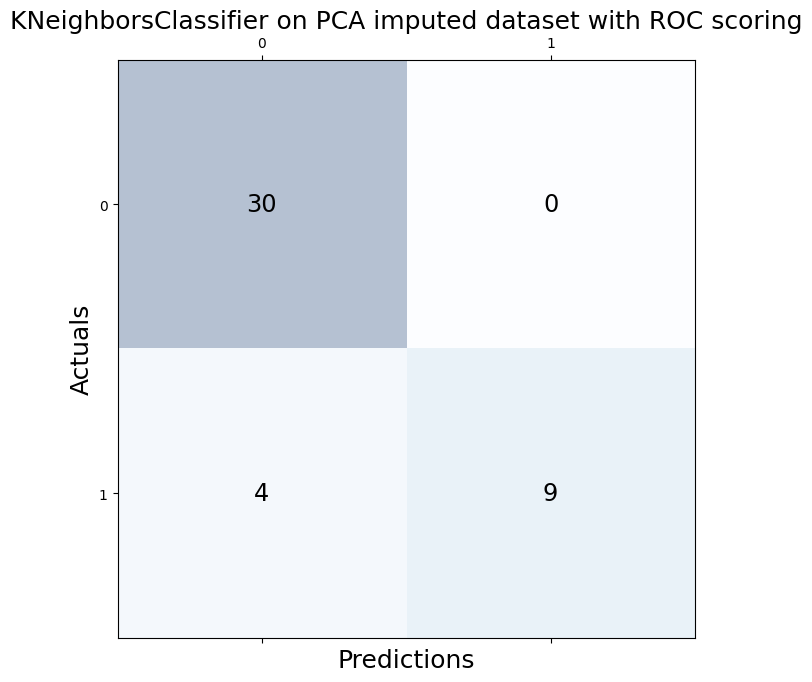

In [43]:
# Displaying the confusion matrix for 2 classes (Groups - ASD and TD)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm=confusion_matrix(y_train, y_pred)
#print(X_test)
print(cm)
print(cm.shape[0])
print(cm.shape[1])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('KNeighborsClassifier on PCA imputed dataset with ROC scoring', fontsize=18)
plt.show()


# Validation du KMeans++ "clustering"

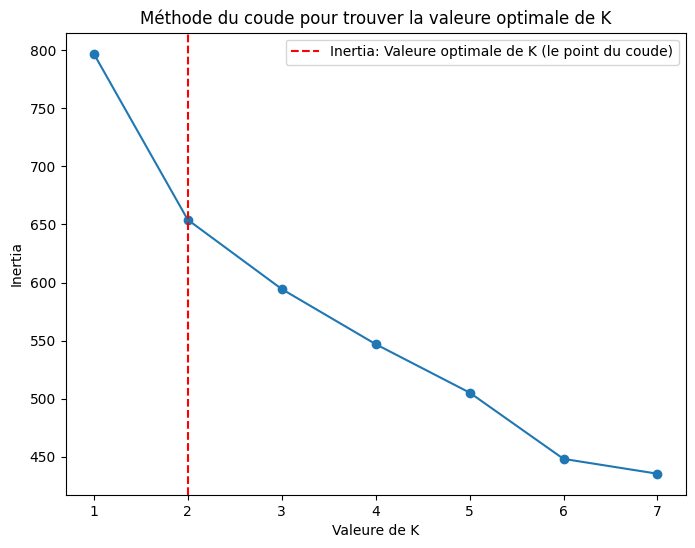

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans # Import KMeans

k_values = range(1, 8)
inertias = []
error_rates = []

for k in k_values:
    # Create a new KMeans instance for each k
    kmeans_model = KMeans(n_clusters=k, init="k-means++", random_state=62) # Initialize with k clusters

    # Fit the model and calculate the error rate
    kmeans_model.fit(X_train, y_train)  # Fit the new model
    y_pred = kmeans_model.predict(X_train) # Predict using the new model
    inertias.append(kmeans_model.inertia_)
    error_rate = 1 - accuracy_score(y_train, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Valeure de K')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour trouver la valeure optimale de K')
plt.axvline(x=2, linestyle='--', color='red', label="Inertia: Valeure optimale de K (le point du coude)")
plt.legend()
plt.show()

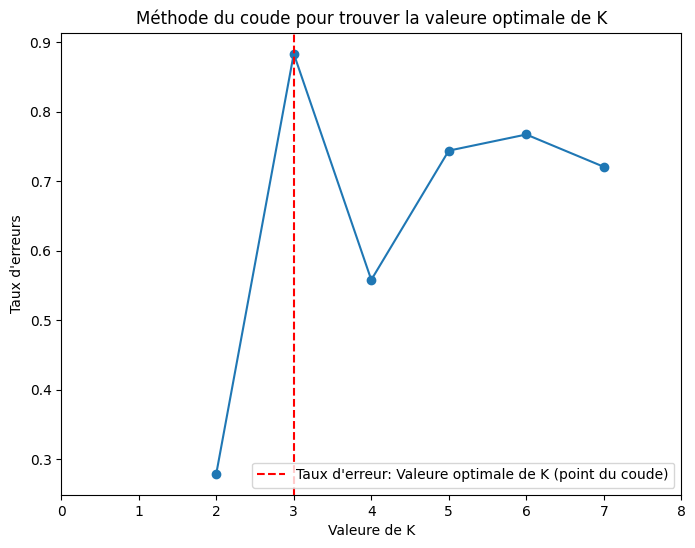

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans # Import KMeans

k_values = range(2, 8)
error_rates = []

for k in k_values:
    # Create a new KMeans instance for each k
    kmeans_model = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=62) # Initialize with k clusters

    # Fit the model and calculate the error rate
    kmeans_model.fit(X_train, y_train)  # Fit the new model
    y_pred = kmeans_model.predict(X_train) # Predict using the new model
    error_rate = 1 - accuracy_score(y_train, y_pred)
    error_rates.append(error_rate)


plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('Valeure de K')
plt.ylabel("Taux d'erreurs")
plt.xlim(0,8)
plt.title('Méthode du coude pour trouver la valeure optimale de K')
plt.axvline(x=3, linestyle='--', color='red', label="Taux d'erreur: Valeure optimale de K (point du coude)")
plt.legend()
plt.show()

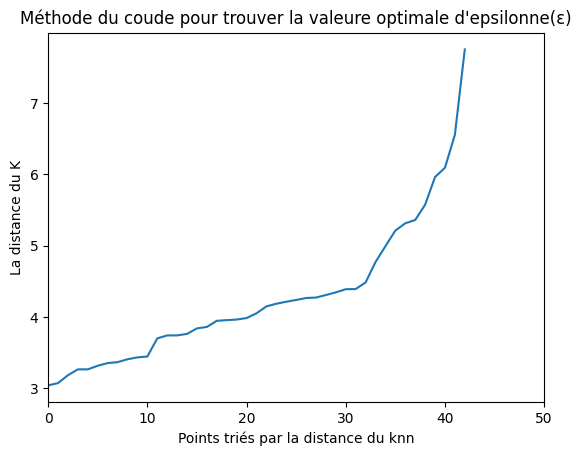

In [ ]:
#On applique la méthode de l'Elbow avec NearestNeighbors pour trouver la valeure
#optimale d'épsilone.

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_train)
distances, indices = neighbors_fit.kneighbors(X_train)

distances = np.sort(distances[:, 4], axis=0)  # 4 because n_neighbors=5
plt.plot(distances)
plt.xlim(0,50)
plt.xlabel("Points triés par la distance du knn")
plt.ylabel("La distance du K")
plt.title("Méthode du coude pour trouver la valeure optimale d'epsilonne(ε)")
plt.show()

In [ ]:
#Applying DBSCAN to compute the optimal number of clusters and noise
#on the X_train dataset.

import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

# Specify a scoring metric for GridSearchCV, such as 'silhouette'
clf = GridSearchCV(
    estimator=DBSCAN(),
    param_grid={
        'eps': [250.25, 250.3],  # Example values for eps
        'min_samples': [2, 3, 5, 8, 10],  # Example values for min_samples
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    #metric=rca.get_metric(),
    scoring='accuracy',#'accuracy', # Instead of 'accuracy', consider using 'adjusted_rand_score' or other clustering metrics
    refit=True, # The refit=True is set to find the best estimator for predictions.
    verbose=10# Use a valid clustering metric for DBSCAN with GridSearchCV, such as 'silhouette', 'calinski_harabasz', or 'davies_bouldin'
)

# Fit the best model and get cluster labels
clustering_labels = clf.fit(X_train, y_train).best_estimator_.labels_

print("Best estimator: ", clustering_labels)

# Check the number of unique labels (excluding -1 for noise)
n_clusters = len(set(clustering_labels)) - (1 if -1 in clustering_labels else 0)

print("Number of clusters: ", n_clusters)
print("Number of noise points: ", list(clustering_labels).count(-1))

# Only calculate silhouette score if there are at least 2 clusters
if n_clusters >= 2:
    silhouette_avg = metrics.silhouette_score(X_train, clustering_labels)  # Calculate and print the silhouette score
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score cannot be calculated: Number of clusters is less than 2.")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START algorithm=auto, eps=250.25, min_samples=2..................
[CV 1/5; 1/40] END algorithm=auto, eps=250.25, min_samples=2;, score=nan total time=   0.0s
[CV 2/5; 1/40] START algorithm=auto, eps=250.25, min_samples=2..................
[CV 2/5; 1/40] END algorithm=auto, eps=250.25, min_samples=2;, score=nan total time=   0.0s
[CV 3/5; 1/40] START algorithm=auto, eps=250.25, min_samples=2..................
[CV 3/5; 1/40] END algorithm=auto, eps=250.25, min_samples=2;, score=nan total time=   0.0s
[CV 4/5; 1/40] START algorithm=auto, eps=250.25, min_samples=2..................
[CV 4/5; 1/40] END algorithm=auto, eps=250.25, min_samples=2;, score=nan total time=   0.0s
[CV 5/5; 1/40] START algorithm=auto, eps=250.25, min_samples=2..................
[CV 5/5; 1/40] END algorithm=auto, eps=250.25, min_samples=2;, score=nan total time=   0.0s
[CV 1/5; 2/40] START algorithm=auto, eps=250.25, min_samples=3...........

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

[CV 4/5; 19/40] END algorithm=ball_tree, eps=250.3, min_samples=8;, score=nan total time=   0.0s
[CV 5/5; 19/40] START algorithm=ball_tree, eps=250.3, min_samples=8.............
[CV 5/5; 19/40] END algorithm=ball_tree, eps=250.3, min_samples=8;, score=nan total time=   0.0s
[CV 1/5; 20/40] START algorithm=ball_tree, eps=250.3, min_samples=10............
[CV 1/5; 20/40] END algorithm=ball_tree, eps=250.3, min_samples=10;, score=nan total time=   0.0s
[CV 2/5; 20/40] START algorithm=ball_tree, eps=250.3, min_samples=10............
[CV 2/5; 20/40] END algorithm=ball_tree, eps=250.3, min_samples=10;, score=nan total time=   0.0s
[CV 3/5; 20/40] START algorithm=ball_tree, eps=250.3, min_samples=10............
[CV 3/5; 20/40] END algorithm=ball_tree, eps=250.3, min_samples=10;, score=nan total time=   0.0s
[CV 4/5; 20/40] START algorithm=ball_tree, eps=250.3, min_samples=10............
[CV 4/5; 20/40] END algorithm=ball_tree, eps=250.3, min_samples=10;, score=nan total time=   0.0s
[CV 5/5; 

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

[CV 5/5; 36/40] END algorithm=brute, eps=250.3, min_samples=2;, score=nan total time=   0.0s
[CV 1/5; 37/40] START algorithm=brute, eps=250.3, min_samples=3.................
[CV 1/5; 37/40] END algorithm=brute, eps=250.3, min_samples=3;, score=nan total time=   0.0s
[CV 2/5; 37/40] START algorithm=brute, eps=250.3, min_samples=3.................
[CV 2/5; 37/40] END algorithm=brute, eps=250.3, min_samples=3;, score=nan total time=   0.0s
[CV 3/5; 37/40] START algorithm=brute, eps=250.3, min_samples=3.................
[CV 3/5; 37/40] END algorithm=brute, eps=250.3, min_samples=3;, score=nan total time=   0.0s
[CV 4/5; 37/40] START algorithm=brute, eps=250.3, min_samples=3.................
[CV 4/5; 37/40] END algorithm=brute, eps=250.3, min_samples=3;, score=nan total time=   0.0s
[CV 5/5; 37/40] START algorithm=brute, eps=250.3, min_samples=3.................
[CV 5/5; 37/40] END algorithm=brute, eps=250.3, min_samples=3;, score=nan total time=   0.0s
[CV 1/5; 38/40] START algorithm=brute

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


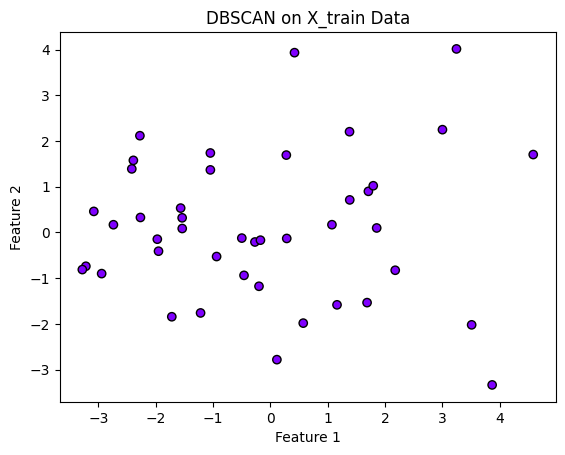

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

labels = clustering_labels
print(labels)

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title("DBSCAN on X_train Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


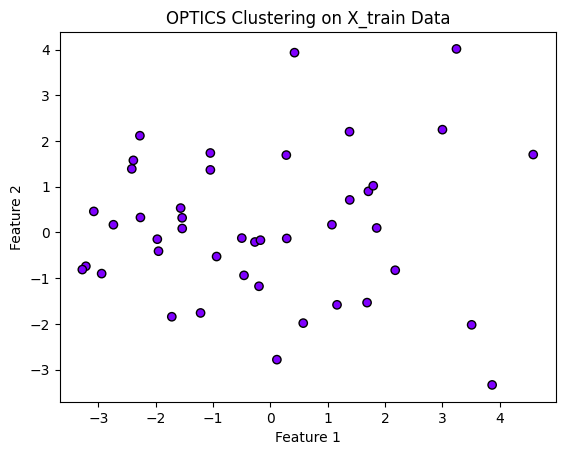

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=2)
clustering.fit_predict(X_train)

labels = clustering.labels_
print(labels)

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title("OPTICS Clustering on X_train Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


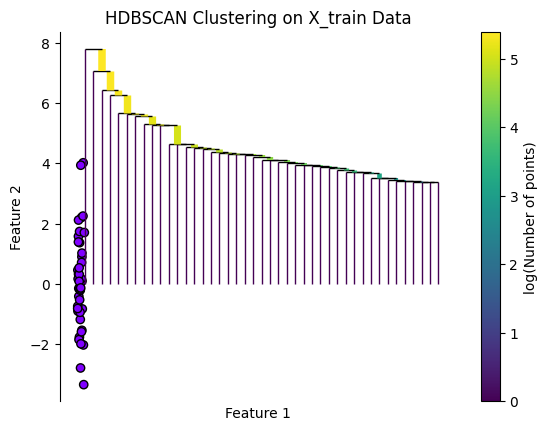

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt

clustering = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=2)
y_pred = clustering.fit_predict(X_train)

labels = clustering.labels_
print(labels)

clustering.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title("HDBSCAN Clustering on X_train Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


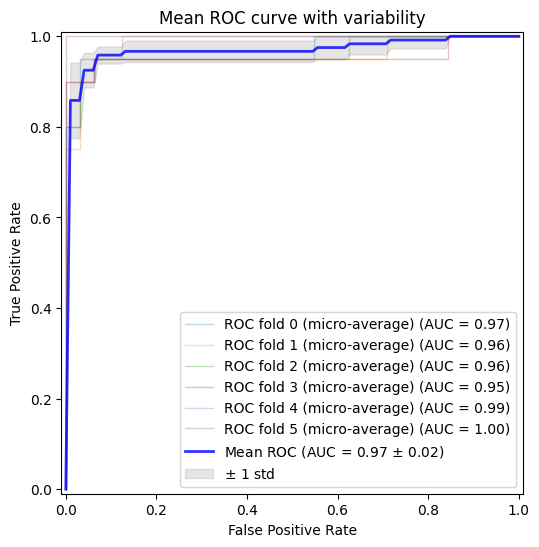

In [ ]:
#Classifying (Groups): (ASD, TD) with
#SVM classifier.   Fit and predict then visualize model performance using the
#ROC method (True Positives vs False Positives rates).

import matplotlib.pyplot as plt
import numpy as np  # Import numpy

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize

n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(kernel="linear", probability=True, random_state=42)
#bandwidth = estimate_bandwidth(X_pca, quantile=0.33)
#classifier = MeanShift(bandwidth=bandwidth)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))

#print(train)
#print(test)
for fold, (train, test) in enumerate(cv.split(X_pca, y_numeric)):
    classifier.fit(X_pca[train], y_numeric[train])

    # Predict probabilities for each class
    y_score = classifier.decision_function(X_pca[train])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    n_classes = len(np.unique(y_numeric))
    for i in range(n_classes):
        # Access y_score directly using a single index since it's 1D
        fpr[i], tpr[i], _ = roc_curve(y[train] == i, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area (for multi-class)
    fpr["micro"], tpr["micro"], _ = roc_curve(y_numeric[train], y_score)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Interpolate the tpr to have the same number of points as mean_fpr
    interp_tpr = np.interp(mean_fpr, fpr["micro"], tpr["micro"])
    interp_tpr[0] = 0.0  # Ensure the curve starts at (0, 0)
    tprs.append(interp_tpr)
    aucs.append(roc_auc["micro"])

    # Plot micro-average ROC curve (for multi-class)
    viz = RocCurveDisplay(fpr=fpr["micro"], tpr=tpr["micro"], roc_auc=roc_auc["micro"],
                          estimator_name=f"ROC fold {fold} (micro-average)")
    viz.plot(ax=ax, alpha=0.3, lw=1)

# Calculate mean and standard deviation of tprs and aucs
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  # Ensure the curve ends at (1, 1)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std")

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability",  # Removed target_names as it was not defined
)
ax.legend(loc="lower right")
plt.show()

[[27  0]
 [ 5 11]]
2
2


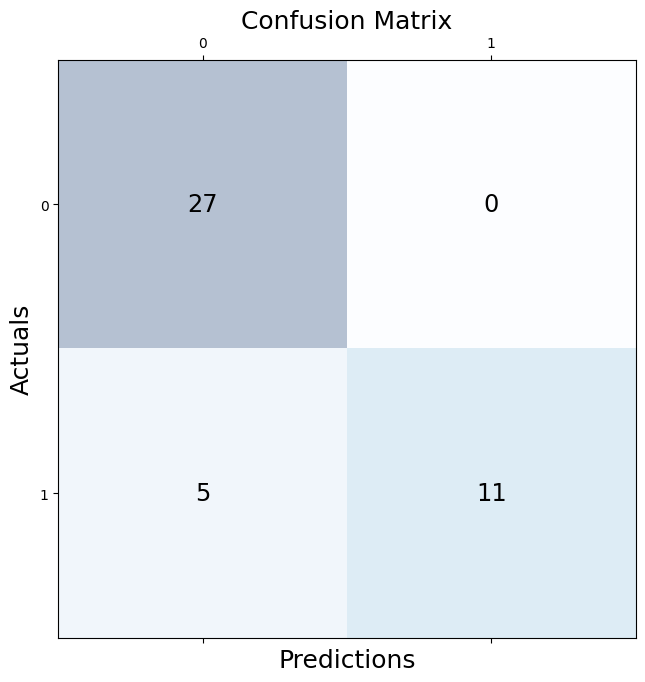

In [ ]:
# Displaying the confusion matrix for 2 classes (Groups - ASD and TD)

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_train)
cm=confusion_matrix(y_train, y_pred)
#print(X_test)
print(cm)
print(cm.shape[0])
print(cm.shape[1])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
!pip install scipy

In [ ]:
!pip install hdbscan